In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import lightgbm as lgb
import os

import warnings
warnings.filterwarnings('ignore')

In [ ]:
(80402+79645+79933+79563+80013)/5

In [2]:
fold = 0
path = 'models_DART_all_corr_pacslope_lag_avediff/'
for fname in os.listdir(path):
            if fname.startswith("fold_{}_iter".format(fold)):
                print(fname)
                model = joblib.load(path + fname)
                model.save_model(path + 'cp_{}_model.txt'.format(fold))

fold_0_iter_6850_score_0.80172.pkl


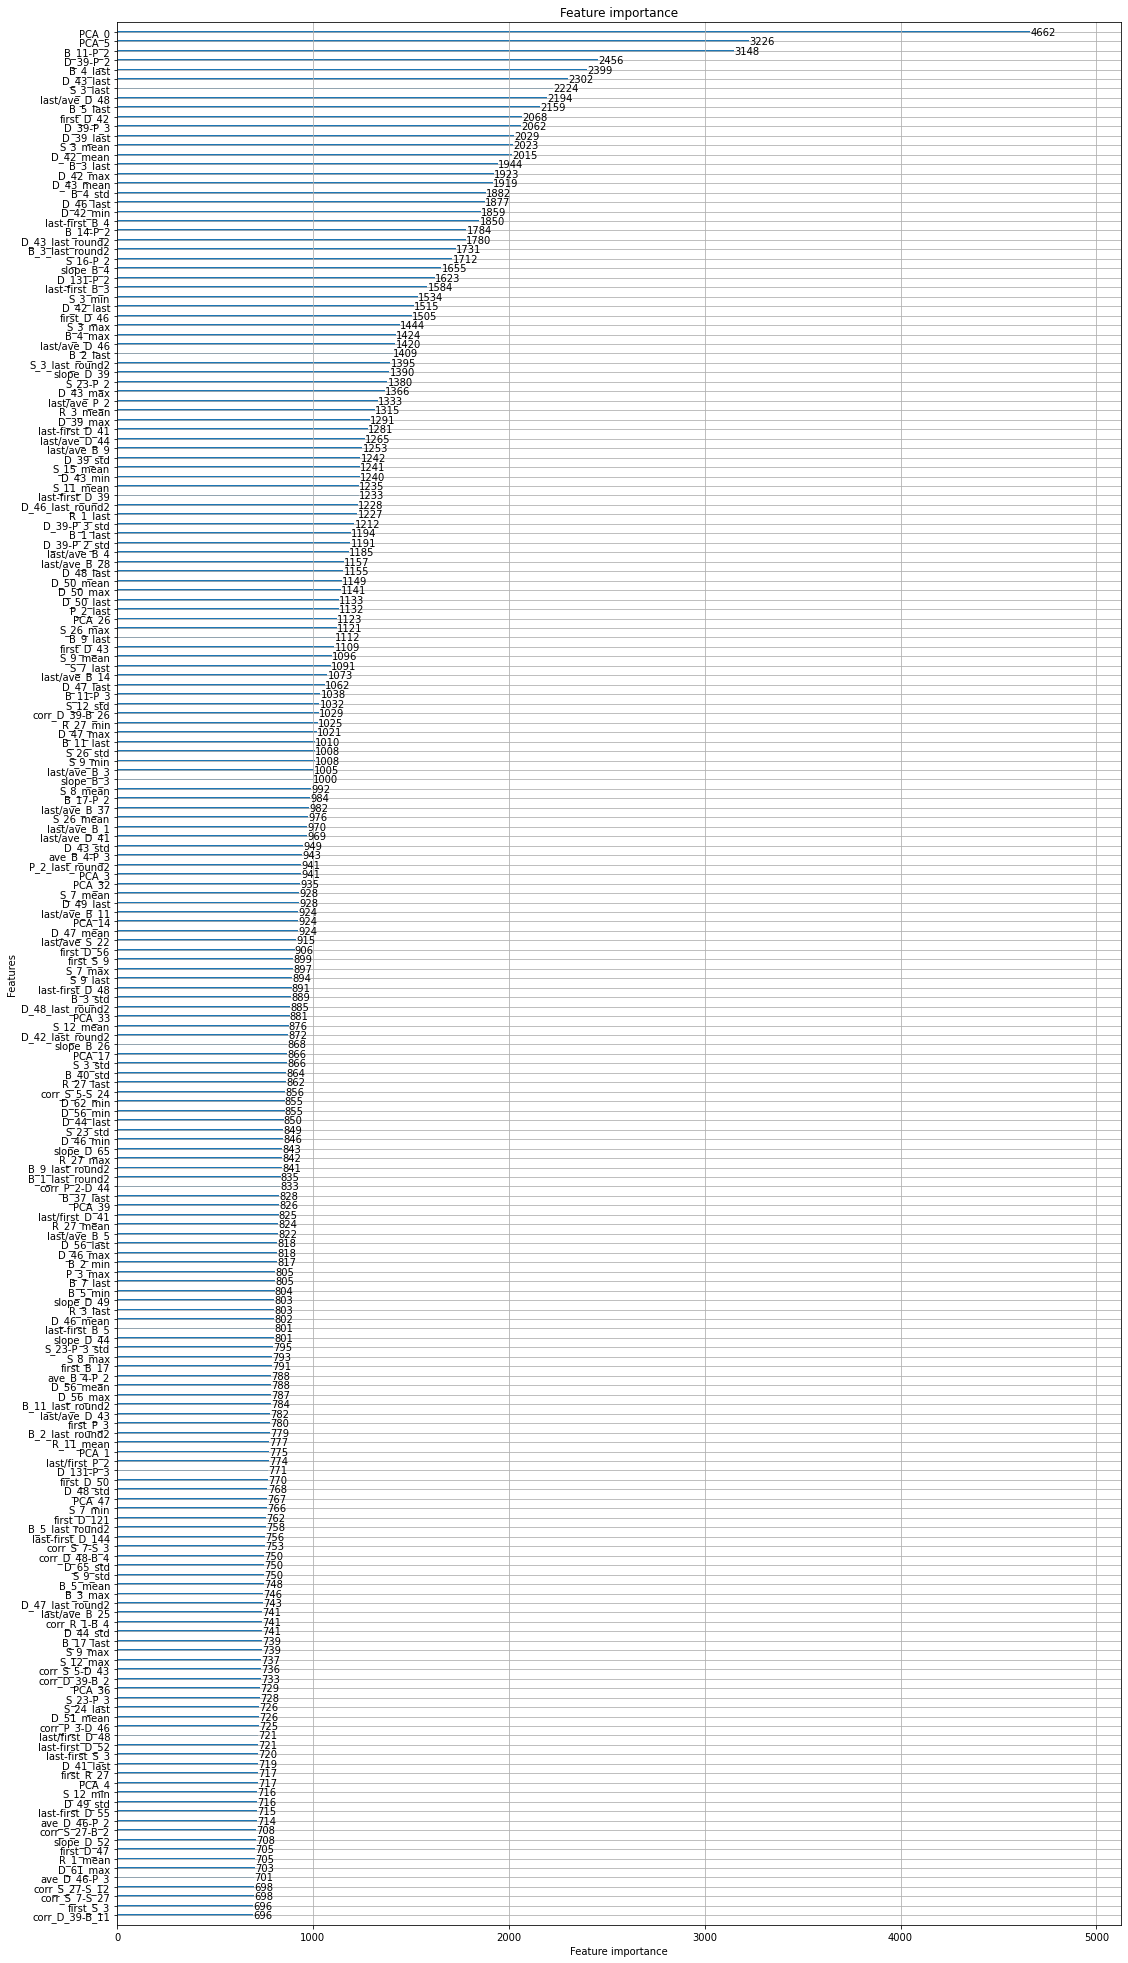

In [4]:
plt.rcParams["figure.figsize"] = (18, 35)
lgb.plot_importance(model, importance_type='split' , max_num_features=200);

In [5]:
fe = model.feature_importance(importance_type='split')
fn = model.feature_name()
df = pd.DataFrame(fe, index=fn, columns=['importance'])
df.sort_values(by='importance', ascending=False, inplace=True)
df.reset_index(inplace=True)

In [6]:
df.head(50)

,index,importance
0,PCA_0,4662
1,PCA_5,3226
2,B_11-P_2,3148
3,D_39-P_2,2456
4,B_4_last,2399
5,D_43_last,2302
6,S_3_last,2224
7,last/ave_D_48,2194
8,B_5_last,2159
9,first_D_42,2068


In [7]:
df[df.importance == 0].shape

(196, 2)

In [8]:
df[df['index'].str.startswith('ave_')]

,index,importance
87,ave_B_4-P_3,943
143,ave_B_4-P_2,788
189,ave_D_46-P_2,714
195,ave_D_46-P_3,701
305,ave_B_11-P_2,609
311,ave_S_16-P_2,608
313,ave_S_16-P_3,607
346,ave_D_44-P_3,586
354,ave_D_44-P_2,582
368,ave_D_39-P_3,573


In [10]:
df[df['index'].str.startswith('last/')]


,index,importance
7,last/ave_D_48,2194
33,last/ave_D_46,1420
39,last/ave_P_2,1333
43,last/ave_D_44,1265
44,last/ave_B_9,1253
...,...,...
2053,last/ave_B_42,0
2055,last/ave_R_28,0
2056,last/first_B_39,0
2062,last/first_D_109,0


In [11]:
df[df['index'].str.startswith('slope_')]

,index,importance
25,slope_B_4,1655
36,slope_D_39,1390
79,slope_B_3,1000
107,slope_B_26,868
118,slope_D_65,843
...,...,...
2035,slope_D_93,0
2036,slope_R_23,0
2037,slope_D_88,0
2038,slope_R_18,0


In [12]:
df[df['index'].str.startswith('PCA_')]

,index,importance
0,PCA_0,4662
1,PCA_5,3226
62,PCA_26,1123
88,PCA_3,941
90,PCA_32,935
95,PCA_14,924
104,PCA_33,881
109,PCA_17,866
124,PCA_39,826
150,PCA_1,775


In [13]:
df[df['index'].str.startswith('corr_')]

,index,importance
72,corr_D_39-B_26,1029
112,corr_S_5-S_24,856
122,corr_P_2-D_44,833
160,corr_S_7-S_3,753
163,corr_D_48-B_4,750
168,corr_R_1-B_4,741
173,corr_S_5-D_43,736
174,corr_D_39-B_2,733
179,corr_P_3-D_46,725
190,corr_S_27-B_2,708


In [19]:
df[df['index'].str.startswith('pca')]

,index,importance
408,pca_s1,549
485,pca_s2,513


In [14]:
score = pd.read_csv('Data/corr_importance.csv')

In [ ]:
score.sort_values(by='score_first', ascending=False, inplace=True)

In [ ]:
top_corr = score['first'].unique()[:90]
top_corr

In [ ]:
for i in range(0,90):
    print(top_corr[i], end=', ')
    score_first = score[score['first'] == top_corr[i]].sort_values(by='corr', ascending=False)
    high_corr_list = score_first[score_first['corr'] > 0.4]['name'].to_list()
    print(set(top_corr).intersection(set(high_corr_list)))

In [ ]:
len(['corr_D_39-B_26', 'corr_D_48-B_4', 'corr_P_2-D_44',
       'corr_D_47-B_4', 'corr_D_47-D_39', 'corr_P_2-B_4',
       'corr_D_39-B_10', 'corr_D_44-B_4', 'corr_D_39-B_2',
       'corr_D_46-B_4', 'corr_D_48-B_3',
       'corr_D_48-B_9', 'corr_S_5-S_24', 'corr_S_7-S_3',
       'corr_D_43-D_144', 'corr_D_48-D_39',
       'corr_P_3-D_46', 'corr_S_5-D_43', 'corr_R_1-B_4',
       'corr_P_3-D_47', 'corr_D_39-B_3', 'corr_R_6-D_39', 'corr_S_27-B_2',
       'corr_S_23-D_43', 'corr_R_6-D_69', 'corr_P_2-D_48',
       'corr_S_25-B_4', 'corr_D_43-B_4', 'corr_R_27-D_69',
       'corr_S_7-S_27', 'corr_D_39-B_11', 'corr_S_3-D_39',
       'corr_S_12-B_4', 'corr_D_39-B_15',
       'corr_R_27-B_26', 'corr_S_23-D_39', 'corr_R_27-R_1',
       'corr_R_1-D_39', 'corr_S_19-D_39', 'corr_S_27-B_3',
       'corr_S_16-D_39', 'corr_R_27-B_5', 
       'corr_S_3-D_62', 'corr_D_71-D_62', 'corr_R_27-D_39',
       'corr_D_48-D_43', 'corr_D_61-B_36',
       'corr_S_25-D_39', 'corr_R_6-D_43', 'corr_S_27-R_27',
       'corr_S_27-S_12', 'corr_S_27-D_39', 'corr_D_46-B_3',
       'corr_D_62-D_47', 'corr_B_4-B_3', 'corr_R_1-D_48',
       'corr_S_16-D_46', 'corr_D_61-D_48', 'corr_P_2-D_39',
       'corr_R_27-B_2', 'corr_D_52-D_39', 'corr_S_26-D_62',
       'corr_S_23-R_27', 'corr_D_69-B_24',
       'corr_R_27-D_62', 'corr_S_19-R_27',
       'corr_R_27-B_21', 'corr_D_52-B_4', 'corr_B_4-B_15',
       'corr_D_47-B_3', 'corr_D_43-B_3', 'corr_R_27-D_71',
       'corr_D_62-D_144', 'corr_D_39-B_5', 'corr_D_48-D_44',
       'corr_S_26-D_43', 'corr_S_5-D_48', 'corr_S_26-D_39',
       'corr_P_2-D_61', 'corr_S_27-S_22'])